In [1]:
import numpy as np
import pandas as pd
import scipy as sc
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt 
import string 
%matplotlib inline

In [11]:
Analysis = pd.read_csv('Analysis.csv')
Analysis = Analysis.drop(['Unnamed: 0'], axis = 1)
Analysis.head()

,Name_in,DateTime_in,Found Location,Intake Type,Intake Condition,Animal Type_in,Age upon Intake,DateTime_out,Date of Birth,Outcome Type,Age upon Outcome,Breed_out,Color_out,Gender_in,Sterill_in,Sterill_out,group of age_in,days_of_stay,group of stay
0,1,2019-01-03 16:19:00,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,2 years,2019-01-08 15:11:00,2017-01-03 00:00:00,Transfer,2 years,Beagle Mix,Tricolor,Male,1,1,1-3 years,4,0-7 days
1,1,2015-07-05 12:59:00,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,8 years,2015-07-05 15:13:00,2007-07-05 00:00:00,Return to Owner,8 years,English Springer Spaniel,White/Liver,Female,1,1,7-9 years,0,0-7 days
2,1,2016-04-14 18:43:00,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,11 months,2016-04-21 17:17:00,2015-04-17 00:00:00,Return to Owner,1 year,Basenji Mix,Sable/White,Male,0,1,7-12 months,6,0-7 days
3,0,2013-10-21 07:59:00,Austin (TX),Stray,Sick,Cat,4 weeks,2013-10-21 11:39:00,2013-09-21 00:00:00,Transfer,4 weeks,Domestic Shorthair Mix,Calico,Female,0,0,1-6 weeks,0,0-7 days
4,1,2014-06-29 10:38:00,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,4 years,2014-07-02 14:16:00,2010-06-29 00:00:00,Return to Owner,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,Male,1,1,4-6 years,3,0-7 days


Переведем категориальные значения в цифры

In [12]:
from sklearn.preprocessing import LabelEncoder
columns = ['Found Location', 'Intake Type', 'Intake Condition', 'Animal Type_in','Age upon Intake', 'Outcome Type',
          'Age upon Outcome', 'Breed_out', 'Color_out', 'Gender_in', 'Sterill_in', 'Sterill_out', 'group of age_in', 'days_of_stay',
          'group of stay']

def encoder(df):
    for col in columns:
        label_encoder = LabelEncoder()
        label_encoder.fit(df[col])
        df[col] = label_encoder.transform(df[col])
    return df

In [13]:
Analysis = encoder (Analysis)

TypeError: argument must be a string or number

In [14]:
Analysis.head()

,Name_in,DateTime_in,Found Location,Intake Type,Intake Condition,Animal Type_in,Age upon Intake,DateTime_out,Date of Birth,Outcome Type,Age upon Outcome,Breed_out,Color_out,Gender_in,Sterill_in,Sterill_out,group of age_in,days_of_stay,group of stay
0,1,2019-01-03 16:19:00,13510,3,5,1,22,2019-01-08 15:11:00,2017-01-03 00:00:00,7,23,285,461,1,1,1,0,1547,0-7 days
1,1,2015-07-05 12:59:00,29914,3,5,1,44,2015-07-05 15:13:00,2007-07-05 00:00:00,5,50,1097,513,0,1,1,5,1543,0-7 days
2,1,2016-04-14 18:43:00,14512,3,5,1,9,2016-04-21 17:17:00,2015-04-17 00:00:00,5,6,252,389,1,0,1,4,1549,0-7 days
3,0,2013-10-21 07:59:00,31176,3,9,0,32,2013-10-21 11:39:00,2013-09-21 00:00:00,7,35,1046,202,0,0,0,2,1543,0-7 days
4,1,2014-06-29 10:38:00,26749,3,5,1,33,2014-07-02 14:16:00,2010-06-29 00:00:00,5,36,1012,425,1,1,1,3,1546,0-7 days


## Вопросы:
     1.Почему, не смотря на ошибку, перекодировалось? Как сделать правильно?
     2. Что делать с датами? Удалить? Вроде бы они нам не особо нужны
     3. А с группировками по возрасту и дням в приюте? Оставить только возраст и дни? По сути, эти колонки важнее, чем группировка

In [15]:
Analysis = Analysis.drop(['DateTime_in', 'DateTime_out', 'Date of Birth', 'group of age_in', 'group of stay'], axis = 1)
Analysis.head()

,Name_in,Found Location,Intake Type,Intake Condition,Animal Type_in,Age upon Intake,Outcome Type,Age upon Outcome,Breed_out,Color_out,Gender_in,Sterill_in,Sterill_out,days_of_stay
0,1,13510,3,5,1,22,7,23,285,461,1,1,1,1547
1,1,29914,3,5,1,44,5,50,1097,513,0,1,1,1543
2,1,14512,3,5,1,9,5,6,252,389,1,0,1,1549
3,0,31176,3,9,0,32,7,35,1046,202,0,0,0,1543
4,1,26749,3,5,1,33,5,36,1012,425,1,1,1,1546


Матрица корелляций

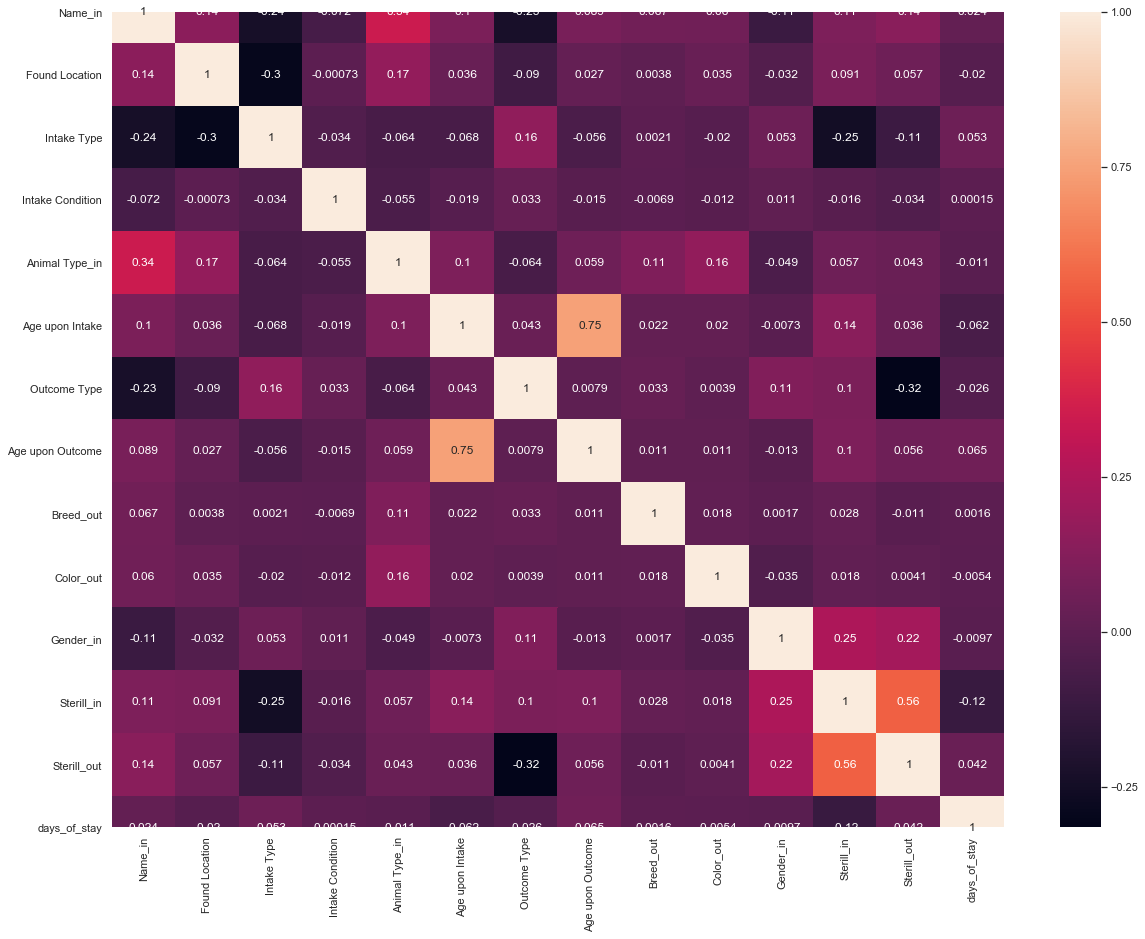

In [18]:
corr_matrix = Analysis.corr()
sns.set(rc={'figure.figsize':(20, 15)})
sns.heatmap(corr_matrix, annot = True, xticklabels = corr_matrix.columns.values,yticklabels = corr_matrix.columns.values)

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


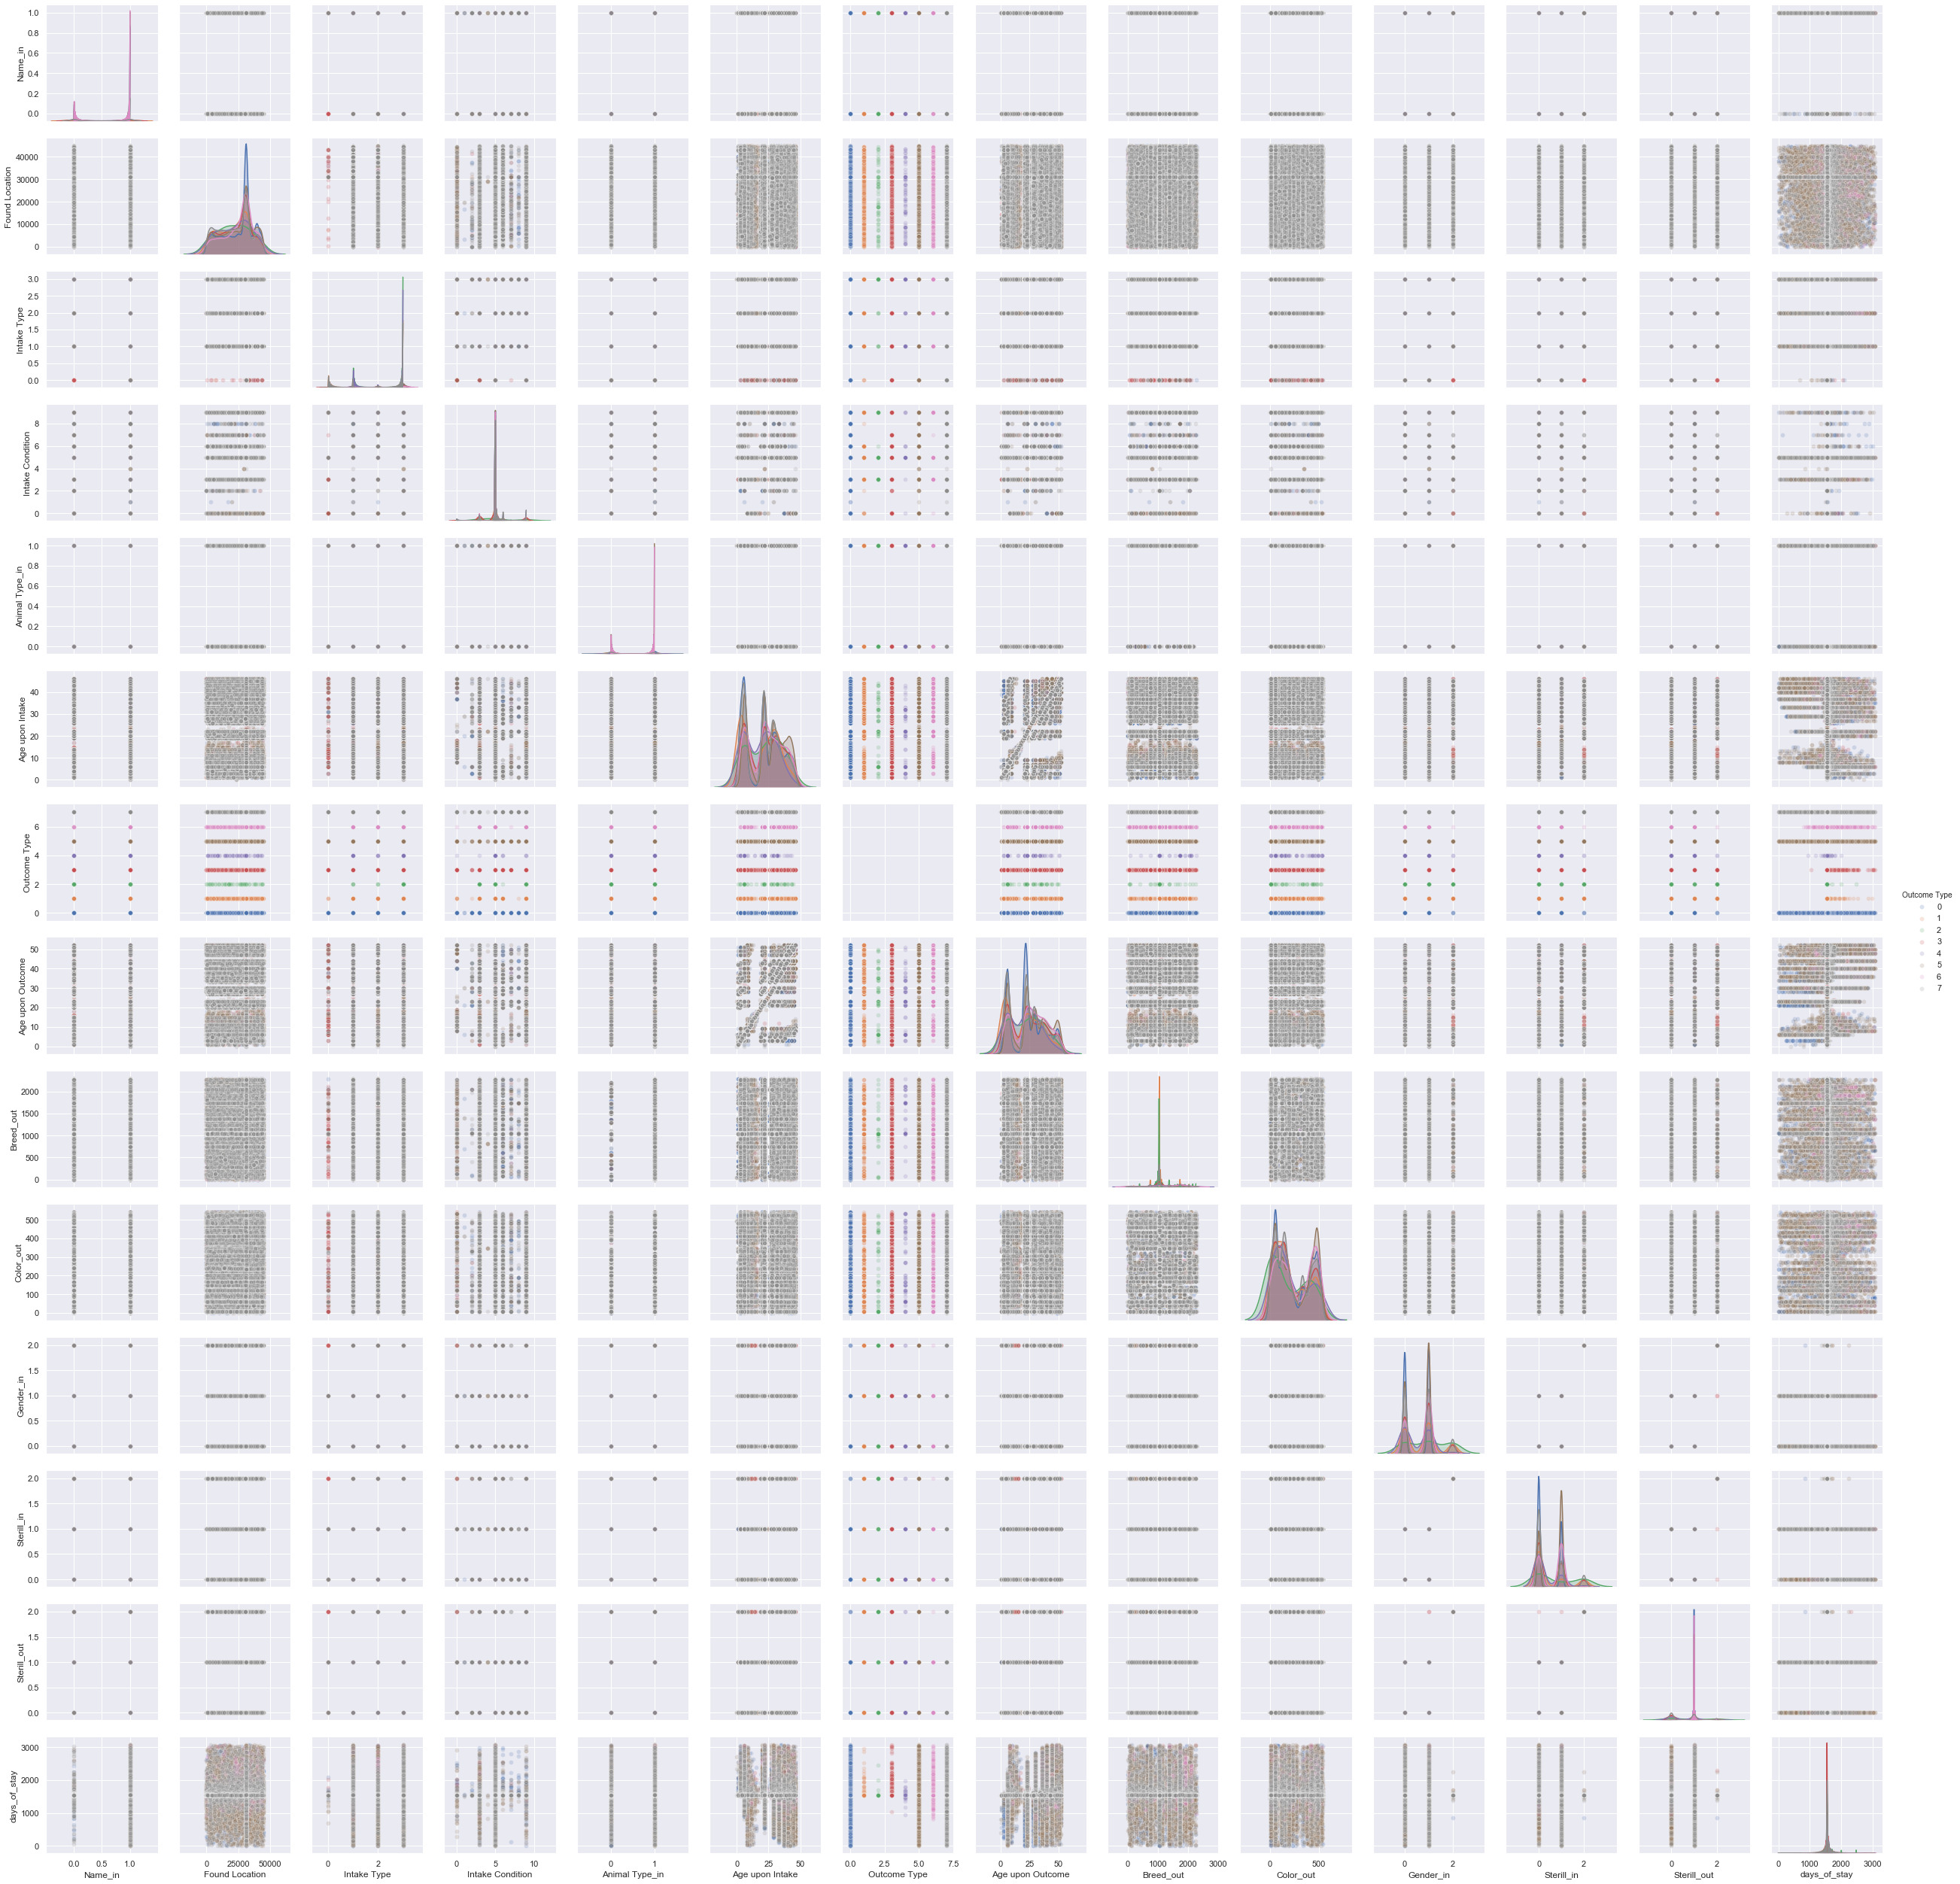

In [22]:
graph = sns.pairplot(data=Analysis ,plot_kws={'alpha':0.2},hue='Outcome Type')

In [19]:
corrmat = Analysis.corr()
fcor=corrmat.abs().unstack().sort_values(ascending=False).reset_index()
fcor.columns = ['Feature_1', 'Feature_2','r']
fcor.query('Feature_2 !="Outcome Type" & Feature_1 == "Outcome Type"').head()

,Feature_1,Feature_2,r
20,Outcome Type,Sterill_out,0.315253
31,Outcome Type,Name_in,0.230246
38,Outcome Type,Intake Type,0.159934
50,Outcome Type,Gender_in,0.112284
63,Outcome Type,Sterill_in,0.100686


In [20]:
high_corr = fcor.\
query('Feature_2 !="Outcome Type" & Feature_1 == "Outcome Type" & r>0.1')['Feature_2'].tolist()
high_corr.append('Outcome Type')
high_corr

['Sterill_out',
 'Name_in',
 'Intake Type',
 'Gender_in',
 'Sterill_in',
 'Outcome Type']

In [21]:
low_corr = (fcor.query('r<0.1 & Feature_2 == "Outcome Type"')['Feature_1']).tolist()
low_corr

['Found Location',
 'Animal Type_in',
 'Age upon Intake',
 'Breed_out',
 'Intake Condition',
 'days_of_stay',
 'Age upon Outcome',
 'Color_out']

Вот тут должна быть нормализация

Разделение на трейн и тест

In [ ]:
from sklearn.model_selection import train_test_split

X = all.drop('Outcome Type', axis =1)
y = all['Outcome Type']
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.3, random_state = 42)

## Какие методы обучения можно использовать
Наивный байесовский классификатор - не понимаю его, как применять?

Рандом Форест - есть наметки

Метод ближайших соседей - вроде бы тоже понятно